In [1]:
# ME17B158 - Omkar Nath

## Week 6: Assignment

## K-means Clustering

In [2]:
#Import libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import random

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

In [3]:
# Write code here
df1 = pd.read_csv('kmc-data1.csv', header = None)

In [4]:
print(df1.head())

          0          1
0  5.816928  24.675884
1  6.639574  33.802423
2  2.050452  24.566468
3  4.153823  27.674693
4  6.515127  26.292065


Text(0.5, 1.0, 'Visualizing the Data')

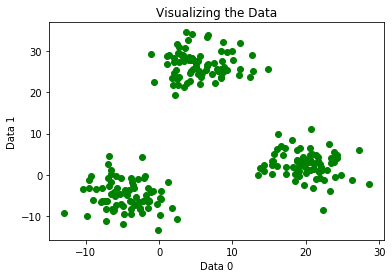

In [5]:
plt.scatter(df1[0], df1[1], color="green")
plt.xlabel("Data 0")
plt.ylabel("Data 1")
plt.title("Visualizing the Data")

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

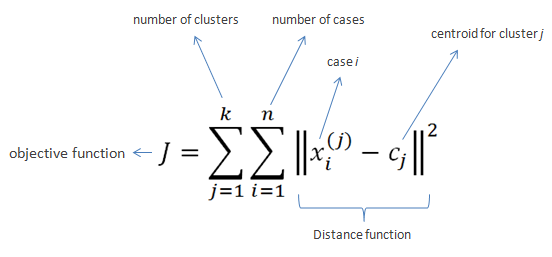

In [6]:
# Write code here
C = [6.67, 8.33]
WCSS = np.sum([((df1[0][i] - C[0])**2 + (df1[1][i] - C[1])**2) for i in range(len(df1))])
print("Within Cluster Sum of Squares (WCSS) for k=1: ",WCSS)

Within Cluster Sum of Squares (WCSS) for k=1:  73409.43272669788


**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [7]:
import numpy as np
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    
    #Your code here
    for i in range(size):
        dist = [sum([(data[j][i]-centroids[j][k])**2 for j in range(data.shape[1])]) for k in range(K)]
        data_class[i] = dist.index(min(dist))+1
        
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [8]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    
    #Your code here
    for k in range(K):
        centroids[k] = np.mean(data[data_class == (k+1)], axis=0)
        
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [9]:
def wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    
    #Your code here
    wcss_clusterwise = [sum([(data[i][j]-centroids[k][j])**2 for j in range(data.shape[1]) for i in range(len(data))]) for k in range(K)]
    
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [10]:
def kmeans(data,K,centroids):
    # Write code here
    
    prev_centroids = centroids
    df_centroids = pd.DataFrame(centroids)
    tolerance = float('inf')
    
    while tolerance>0.001:
        
        data_class = get_class(data, df_centroids, K)
        
        centroids = get_centroids(data, data_class, K)
        
        tolerance = np.linalg.norm(centroids - prev_centroids)
        
        df_centroids = pd.DataFrame(centroids)
        prev_centroids = centroids
        
    data_class = get_class(data,df_centroids,K)
    
    return centroids, data_class

In [11]:
# Running kmeans
K = 3
centroids = [[10, 30],[25, -5],[-5, 10]]
df_centroids = pd.DataFrame(centroids)

centroids, data_class = kmeans(df1,K,df_centroids)

Text(0.5, 1.0, 'K=3 Clusters Visualization')

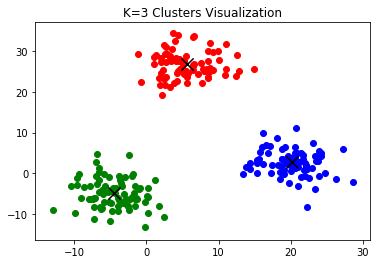

In [12]:
# Plotting
colors=['red', 'blue', 'green']

for i in range(len(df1)):
    plt.scatter(df1[0][i], df1[1][i], color = colors[int(data_class[i])-1])
    
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black', s=150)
plt.title("K=3 Clusters Visualization")

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [13]:
#  Write code here
def sum_sqr_dist(data, centroids, data_class):
    centroids = pd.DataFrame(centroids)
    K = len(centroids)
    sum_sqr_dist = [0]*K
    
    sum_sqr_dist = sum([(data[j][i]-centroids[j][data_class[i]-1])**2 for j in range(data.shape[1]) for i in range(len(data))])
    
    return sum_sqr_dist

In [14]:
print("Sum Squared Distance for K=3 is: ", sum_sqr_dist(df1, centroids, data_class))

Sum Squared Distance for K=3 is:  4936.722230493094


**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

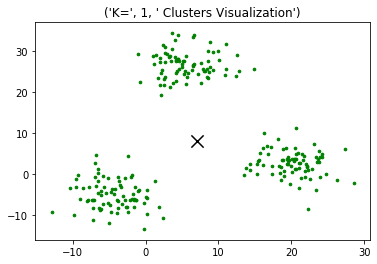

Sum of square distances from cluster controids for K= 1 is  73354.85577801643


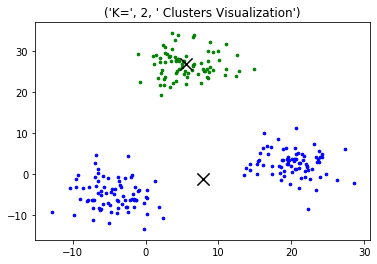

Sum of square distances from cluster controids for K= 2 is  31491.43810145576


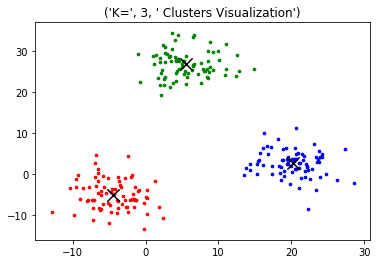

Sum of square distances from cluster controids for K= 3 is  4936.722230493094


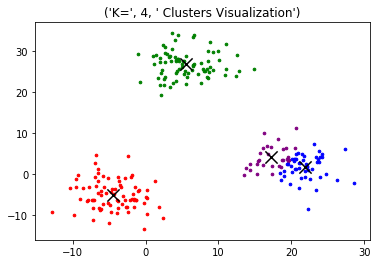

Sum of square distances from cluster controids for K= 4 is  4419.65510718069


In [15]:
#  Write code here

colors=['green', 'blue', 'red', 'purple']
centers = [[10, 30],[25, -5],[-5, 10],[10,10]]
K_list = [1,2,3,4]

for i, k in enumerate(K_list):
    # Initializing centers
    centroids = centers[:(i+1)] 
    df_centroids = pd.DataFrame(centroids)
    
    # Applying k_means
    centroids, data_class = kmeans(df1, k, df_centroids)
    
    #Plotting
    for i in range(len(df1)):
        plt.scatter(df1[0][i], df1[1][i], s=7, color = colors[int(data_class[i])-1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black', s=150)
    plt.title(("K=",k," Clusters Visualization"))
    plt.show()
    
    ssd = sum_sqr_dist(df1, centroids, data_class)
    print("Sum of square distances from cluster controids for K=", k, "is ", ssd)
    

**Observations**
* As the number of clusters increases, the sum of squared distances decreases.
* Intuitively, based on the graph, it would appear that a demarcation of 3 clusters is more intuitive

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

In [16]:
#  Write code here
df2 = pd.read_csv('kmc-data2.csv', header = None)

In [17]:
df2.head()

,0,1
0,0.168757,2.995250
1,1.219350,2.741019
2,2.881121,-0.836147
3,-1.025153,-2.819408
4,-0.724449,2.911215


Text(0.5, 1.0, 'Visualizing the Data')

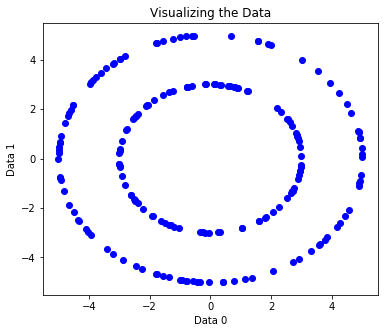

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(df2[0], df2[1], color="blue")
plt.xlabel("Data 0")
plt.ylabel("Data 1")
plt.title("Visualizing the Data")

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

In [19]:
#  Clustering
kMeansCluster = KMeans(n_clusters=2, random_state=42).fit(df2)
data2_class = kMeansCluster.labels_
centroids = kMeansCluster.cluster_centers_

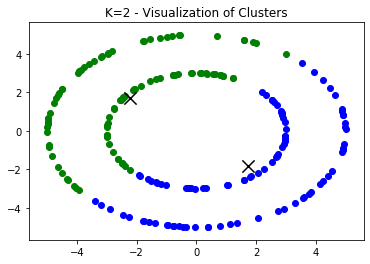

In [20]:
colors = ['blue', 'green']
for j in range(len(df2)):
    plt.scatter(df2[0][j], df2[1][j], color = colors[int(data2_class[j])])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black', s=150)
plt.title('K=2 - Visualization of Clusters')
plt.show()

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

In [21]:
# Representing each point by its distance from the center
centre = np.mean(df2, axis = 0)

df2_transformed = np.zeros((len(df2),2))

for i in range(len(df2)):
    df2_transformed[i][0] = i
    
    for d in range(df2.shape[1]):
        df2_transformed[i][1] = df2_transformed[i][1] + (df2[d][i] - centre[d])**2

Text(0.5, 1.0, 'Visualization of Transformed Data')

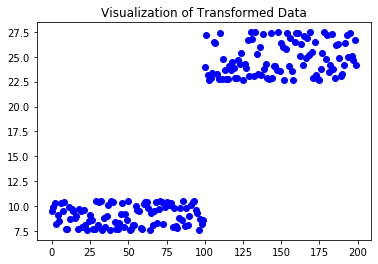

In [22]:
plt.scatter(df2_transformed[:,0], df2_transformed[:,1], c='blue')
plt.title("Visualization of Transformed Data")

In [23]:
# Clustering the comverted data
kMeansCluster2 = KMeans(n_clusters=2, random_state=42).fit(df2_transformed)
data2_class2 = kMeansCluster2.labels_
centroids2 = kMeansCluster2.cluster_centers_

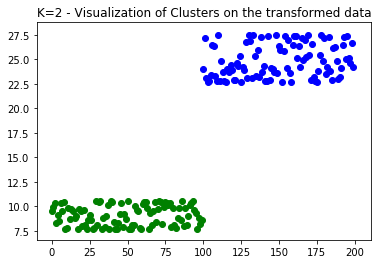

In [24]:
# Visualizing transformed clustered data
colors = ['blue', 'green']
for j in range(len(df2_transformed)):
    plt.scatter(df2_transformed[j,0], df2_transformed[j,1], color = colors[int(data2_class2[j])])
plt.title('K=2 - Visualization of Clusters on the transformed data')
plt.show()

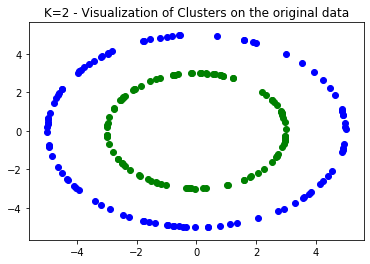

In [25]:
# Visualizing original clustered data
colors = ['blue', 'green']
for j in range(len(df2)):
    plt.scatter(df2[0][j], df2[1][j], color = colors[int(data2_class2[j])])
plt.title('K=2 - Visualization of Clusters on the original data')
plt.show()

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [26]:
# Reading the data
df3 = pd.read_csv('data_banknote_authentication.csv', header = None)

In [27]:
df3.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
y = df3[4]
X = df3.drop(columns=[4])

In [29]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [30]:
# Implementing KMeans Clustering
K = len(y.unique())

kMeansCluster3 = KMeans(n_clusters=K, random_state=0).fit(X_train)
y_pred = kMeansCluster3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The Accuracy through KMeans Clustering is: ", accuracy)

The Accuracy through KMeans Clustering is:  0.6763636363636364


## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

Text(0, 0.5, 'sigmoid(x)')

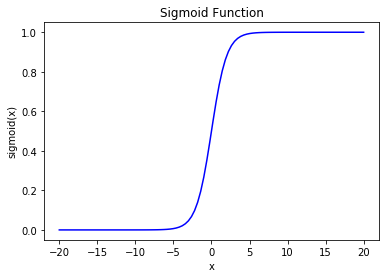

In [31]:
# Plotting the sigmoid function
vals = np.linspace(-20,20,100)
sig_vals = 1/(1+np.exp(-vals))
plt.plot(vals,sig_vals,color='blue')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

In [32]:
#Answer here
# The domain is entire real number spectrum
# Range is restricted from 0 to 1 i.e. (0,1)
# For negative values, it tends towards 0, reaching it only at minus infinity. 
# For positive values, it tends towards 1, reaching it only at infinity. 
# It transitions smoothly from -1 to 1 in essentially a very narrow range of values, around -7 to 7

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

Text(0, 0.5, 'slope of sigmoid(x)')

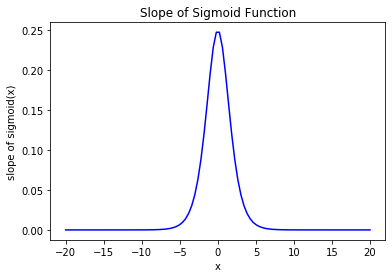

In [33]:
# Plotting Slope of sigmoid function
grad_vals = np.exp(-vals)/((1+np.exp(-vals))**2)
plt.plot(vals,grad_vals,color='blue')
plt.title("Slope of Sigmoid Function")
plt.xlabel("x")
plt.ylabel("slope of sigmoid(x)")

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [34]:
# Importing data
X_input = pd.read_csv('X_logistic.txt', header = None)
y = np.array(pd.read_csv('y_logistic.txt', header = None))

In [35]:
X_input.head()

,0
0,5.099999999999999645e+00 3.500000000000000000e+00
1,4.900000000000000355e+00 3.000000000000000000e+00
2,4.700000000000000178e+00 3.200000000000000178e+00
3,4.599999999999999645e+00 3.100000000000000089e+00
4,5.000000000000000000e+00 3.600000000000000089e+00


In [36]:
X = [0]*len(X_input)
for i in range(len(X_input)):
    X[i] = [float(x) for x in X_input[0][i].split()] 

X = np.array(pd.DataFrame(X))

In [37]:
# Splitting the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=1/9, random_state = 42)

In [38]:
# Sigmoid Function
def sigmoid(x):
    return (1.0/(1.0 + np.exp(-1.0*x)))

In [39]:
# Cost Function
def loss(y_train, model_train):
    loss = -(1/len(y_train))*(np.dot(y_train,np.log(model_train))+np.dot((np.ones(len(y_train))-y_train),(np.log(np.ones(len(y_train))-model_train))))
    return loss

In [40]:
alphas = [0.001, 0.01, 0.1]
num_iters = [50, 100, 1000]
n  = X.shape[1]
m = len(X_train)

cost = np.zeros(3*3*(n + 1 + 1)).reshape(3,3, (n + 1 + 1))
val_cost = np.zeros(3*3).reshape(3, 3)
train_cost = []

In [41]:
# Gradient Descent and Logistic Regression

for i, alpha in enumerate(alphas):
    for j, iters in enumerate(num_iters):
        cost_log = []
        
        # Random initialization
        theta1 = np.array(random.sample(range(-8, 8), 2)).reshape(2,1)
        theta0 = np.array(random.sample(range(-8, 8), 1)).reshape(1,1)
        
        for k in range(iters):
            # Function Value 
            train_hypothesis = np.dot(X_train, theta1) + theta0
            train_function = sigmoid(train_hypothesis)
            
            # Gradient
            dtheta1 = (1/len(y_train)) * np.dot(X_train.T, (train_function - y_train))
            dtheta0 = (1/len(y_train)) * np.sum(train_function - y_train)
            
            # Updation
            theta1 = theta1 - alpha * dtheta1
            theta0 = theta0 - alpha * dtheta0
            
            cost_log.append(loss(y_train.T, train_function))
            
        train_cost.append(cost_log)
        
        cost[i][j][0] = cost_log[-1][-1]
        cost[i][j][2:] = theta1.T
        cost[i][j][1] = theta0 
        
        # Validation Function and Cost
        val_hypothesis = np.dot(X_val, theta1) + (theta0)
        val_function = sigmoid(val_hypothesis)
        
        val_cost[i][j] = loss(y_val.T, val_function)

C:\Users\Primary\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
cost

array([[[ 40.69700378,   4.0174942 ,  -5.89715311,   6.04732752],
        [ 52.60378584,  -3.06232711,  -1.30777923,   5.7841802 ],
        [ 83.96633125,  -5.625     ,  -4.825     ,   2.0375    ]],

       [[104.3851875 ,   0.1875    ,  -2.9125    ,  -6.48125   ],
        [  6.71995931,  -1.61238727,   1.97429741,  -2.11800051],
        [  4.88346175,  -5.08049241,   0.62501326,   0.41258642]],

       [[  2.55102135,  -3.5918773 ,   1.30776658,  -1.20489595],
        [  1.24668681,   1.47190206,   1.96630039,  -3.93848947],
        [  0.2002335 ,  -7.27033389,   5.86610774,  -7.80845673]]])

In [43]:
# Best Alpha and number of iterations
min_cost = np.amin(cost[:,:,0])
result = np.where(cost == min_cost)
print(min_cost)
alpha_index = int(result[0])
best_alpha = alphas[alpha_index]
iters_index = int(result[1])
best_iters = num_iters[iters_index]

print("The Best learning Rate is: ", best_alpha)
print("The Best no. of iterations is Rate is: ", best_iters)
print("These give a cost of: ",min_cost)

0.20023349520863434
The Best learning Rate is:  0.1
The Best no. of iterations is Rate is:  1000
These give a cost of:  0.20023349520863434


In [44]:
# Test results (final)
theta1_final = cost[alpha_index][iters_index][2:]
theta0_final = cost[alpha_index][iters_index][1]

test_hypothesis = np.dot(X_test, theta1_final) + (theta0_final)
test_function = sigmoid(test_hypothesis)

y_pred = [1 if i > 0.5 else 0 for i in test_function]        

test_cost = loss(y_test.T, y_pred)

C:\Users\Primary\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# Using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
theta1_final = cost[2][0][2:]
theta0_final = cost[2][0][1]

accuracy = (conf_matrix[0][0] + conf_matrix[1][1])/(conf_matrix[0][0] + conf_matrix[1][1] + conf_matrix[1][0] + conf_matrix[0][1])

print('Accuracy is:', accuracy)
print('Weights and bias are:', theta1_final, theta0_final)

Accuracy is: 1.0
Weights and bias are: [ 1.30776658 -1.20489595] -3.59187729810681


In [46]:
conf_matrix

array([[6, 0],
       [0, 4]], dtype=int64)

**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

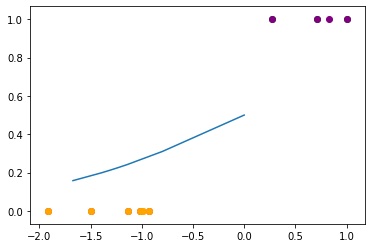

In [47]:
# Code here
X_terms_test = [0]*len(X_test)
for i in range(len(X_test)):
    X_terms_test[i] = theta0_final + theta1_final[0]*X_test[i][0] + theta1_final[1]*X_test[i][1]

X_terms_train = [0]*len(X_train)
for i in range(len(X_train)):
    X_terms_train[i] = theta0_final + theta1_final[0]*X_train[i][0] + theta1_final[1]*X_train[i][1]

X_terms = [0]*len(X)
for i in range(len(X_train)):
    X_terms[i] = theta0_final + theta1_final[0]*X[i][0] + theta1_final[1]*X[i][1]
    
for i in range(len(X_terms_train)):    
    if y_train[i] == 0:
        plt.scatter(X_terms_train[i], y_train[i], color = 'red')
    if y_train[i] == 1:
        plt.scatter(X_terms_train[i], y_train[i], color = 'green')

for i in range(len(X_terms_test)):    
    if y_test[i] == 0:
        plt.scatter(X_terms_test[i], y_test[i], color = 'orange')
    if y_test[i] == 1:
        plt.scatter(X_terms_test[i], y_test[i], color = 'purple')
    
X_terms.sort()
z = [0]*len(X_terms)
for i in range(len(X_terms)):
    z[i] = 1.0/(1.0 + np.exp(-1.0 * X_terms[i]))
plt.plot(X_terms, z)
plt.show()

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [48]:
# Reading the data
df3 = pd.read_csv('data_banknote_authentication.csv', header = None)

In [49]:
y = df3[4]
X = df3.drop(columns=[4])

In [50]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [51]:
# Implementing Logistic Regression
regressor = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The Accuracy through Logistic Regression is: ", accuracy)
# Note that the accuracy is much higher as compared to Clustering

The Accuracy through Logistic Regression is:  0.9890909090909091


C:\Users\Primary\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
